# Probando Algoritmo básico de Gradiente descendente para optimizar una regresión logística


    $$ P()f_{c}(x,\theta) = sigm(w_0+x^T w) $$

Observamos dos cosas nuevas:

1. El Bias $w_0$
2. La regresión lineal que es la entrada de la función sigmoide.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Ejemplo Ilustrativo
Encontrar parámetros de la función $f(x,\theta) = p(y=1|x,\theta)  =sigm(w_0+x^T \mathbf{w}) $ donde $\theta = \{\mathbf{w}, w_0\}$utilizando el algoritmo de gradiente descendiente dado un conjunto de datos clasificados en dos clases.

## 1. Construcción del problema
**Generando dos clases sintéticas con medias $\mu_0 \neq \mu_1$**

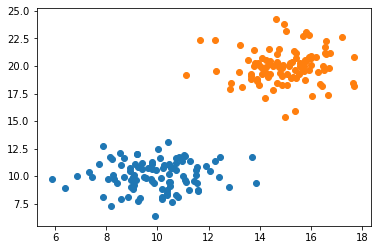

In [2]:
mean00 = [10,10]
mean01 = [15,20]

cov00 = [[2,0],[0,2]]
cov01 = [[2,0],[0,2]]

class00 = np.random.multivariate_normal(mean00, cov00, size=100, check_valid='warn', tol=1e-8)
class01 = np.random.multivariate_normal(mean01, cov01, size=100, check_valid='warn', tol=1e-8)

plt.scatter(class00[:,0],class00[:,1])
plt.scatter(class01[:,0],class01[:,1])
plt.show()

**Generando una sola base de datos de datos clasificados**

In [3]:
zeros = np.zeros(len(class00)).T
labeled_class00 = np.append(class00,np.transpose([zeros]),axis=1)
labeled_class01 = np.append(class01,np.transpose([zeros])+1,axis=1)
labeled_classes = np.append(labeled_class00,labeled_class01,axis=0)

### 2. Definir un modelo de clasificación:

$f(x,\theta) = p(y=1|x,\theta)  =sigm(w_0+x^T \mathbf{w}) $ donde $\theta = \{\mathbf{w}, w_0\}$

donde si $sigm(w_0+x^T \mathbf{w}) > 0.5$ , $x$ pertenece a la clase positiva,y a la clase negativa en caso contrario.

### 3. Definir la función de costo $C$
Definimos nuestra función de "costo".

Usamos la log-verosimilitud $C(\theta) = LL(\theta)$ para evaluar nuestro modelo.

$LL(\theta) = \sum_{i=1}^m (y_i \text{ log } sigm(\mathbf{w}^T \mathbf{x}_i +w_0) + (1-y_i) \text{ log } [1-sigm(\mathbf{w}^T \mathbf{x}_i) + w_0])$

#### 3.1 Formular la función objetivo

$$ \underset{\theta \in \{\mathbf{w},w_0\}}{\text{maximize}} \text{ } LL(\theta)$$


## 4 Seleccionar el algoritmo que maximice la función objetivo.

Gradiente Ascendente

### 4.1 Calculamos la derivada para guiar los parámetros al óptimo.


$\frac{\partial LL(\theta)}{\partial \mathbf{\theta}} = \sum_{i=1}^n [y_i-sigm( \mathbf{w}^T\mathbf{x}_i + w_0 )]x_j $, donde para $j=0$, $x_0 =1$ 

### Gradiente Ascendente


**Utilizando modelo con Bias**
        
$\mathbf{wx}_i+w_0=0$

$x_0w_0$ con $x_0 =  1$

**Modelo sin entrenar**

In [4]:
#inicializar parametros theta
W = np.ones(np.shape(labeled_classes)[1]-1)

#inicializar w_0 (bias)
w_0 = 0

Antes de encontrar los parámetros que nos maximicen la probabilidad de clasificar correctamente

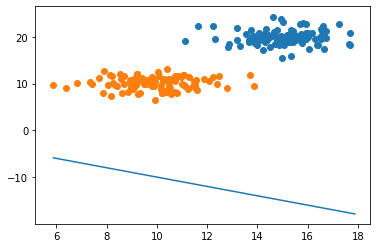

In [5]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
X = np.arange(hmin,hmax)
Y = (-W[0]/W[1])*X-(w_0/W[1])
plt.plot(X,Y)
plt.scatter(class01[:,0],class01[:,1])
plt.scatter(class00[:,0],class00[:,1])
plt.show()

In [6]:
#Ecuación de la sigmoide
sigm = lambda x: 1/(1 + np.exp(-x))

def f(x,bias=w_0):
    return sigm(np.matmul(x,W)+bias)

pred = (np.array(list(map(f,labeled_classes[:,0:-1])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,-1])**2))

Errores de clasificación: 100.0


In [7]:
#eta, tasa de aprendizaje
eta = 0.01


#repetir varias veces
for k in range(1500):
    
    #inicializar gradiente parametros + bias (2 dim + 1)
    g = np.zeros(len(W)+1)

    #por cada tupla (x_i,y_i) 
    for v in labeled_classes:
    
        #asignamos la pareja (o tupla) (x_i,y_i)
        x = v[:2]
        y = v[2]
        
        # por cada parametro
        line = np.matmul(x,W)+w_0
        
        # Calcular la derivada parcial con respecto a cada parámetro w_1, y w_2
        for j in np.arange(len(x)):
    
            #gradiente evaluado con respecto a w_1 y w_2 en la derivada de la funcion de log-verosimilitud
            g[j]+=(y-sigm(line))*x[j]

        
        #gradiente evaluado con respecto a w_0
        g[2] += (y-sigm(line))*1

        
    #actualización de los parámetros
    W += eta*g[:2]
    w_0 += eta*g[2]

    
print("parametros w_1 y w_2",+W)    
print("w_0 (bias)",w_0)

parametros w_1 y w_2 [-3.10307689 10.76829129]
w_0 (bias) -116.0345551960336


In [8]:
#Ecuación de la sigmoide

def f(x,bias=w_0):
    return sigm(np.matmul(x,W)+bias)

pred = (np.array(list(map(f,labeled_classes[:,0:2])))>0.5)*1
print("Errores de clasificación:", np.sum((pred - labeled_classes[:,2])**2))

Errores de clasificación: 0.0


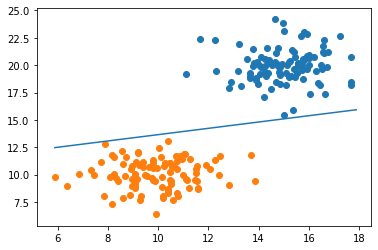

In [9]:
hmin = np.min([class00[:,0],class01[:,0]])
hmax = np.max([class00[:,0],class01[:,0]])+1
w_1 = np.arange(hmin,hmax)

# este es un despeje de w_1*x_1+w_2*x_2+w_0 = 0, 
w_2 = (-W[0]/W[1])*X-(w_0/W[1])
plt.plot(w_1,w_2)
plt.scatter(class01[:,0],class01[:,1])
plt.scatter(class00[:,0],class00[:,1])
plt.show()